In [1]:

import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import time
import os
#os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2
from tqdm import tqdm

import keras
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from keras import optimizers
#from sklearn.metrics import classification_report, confusion_matrix
import sklearn
import seaborn as sn
from keras.callbacks import CSVLogger, LambdaCallback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
frameRate = 1
base_dir = f'../input/bangla-digits-dataset-meghna-joygun/Dataset/'

train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

work_dir = "./"
color_type = 'grayscale' # rgb, grayscale
BATCH_SIZE = 32
#validation_split = 0.5
img_dim = (228,228)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   #rotation_range=90,
                                   #validation_split=validation_split
                                   )
val_datagen = ImageDataGenerator(rescale=1./255,
                                #validation_split=validation_split
                                )
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_dim,
        batch_size=BATCH_SIZE,
        color_mode=color_type, # grayscale, rgb
        class_mode='categorical',
        #classes=['Monocot_Cocos','Monocot_Eichhornia','Monocot_Musa'],
        #subset='training'
        ) 

Found 7000 images belonging to 10 classes.


In [5]:
num_classes = train_generator.num_classes
total_train_data = train_generator.samples

print(f"total_train_data = {total_train_data}")
print(f"train_generator.image_shape = {train_generator.image_shape}")
print(f"num_classes = {num_classes}")

total_train_data = 7000
train_generator.image_shape = (228, 228, 1)
num_classes = 10


In [6]:
val_generator = val_datagen.flow_from_directory(
        val_dir,
        shuffle=False,
        target_size=img_dim,
        batch_size=BATCH_SIZE,
        color_mode=color_type, # grayscale, rgb
        class_mode='categorical',
        #classes=['Monocot_Cocos','Monocot_Eichhornia','Monocot_Musa'],
        #subset='validation'
        )

Found 1000 images belonging to 10 classes.


In [7]:
total_val_data = val_generator.samples
print(f"total_val_data = {total_val_data}")

total_val_data = 1000


In [8]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        shuffle=False,
        target_size=img_dim,
        batch_size=BATCH_SIZE,
        color_mode=color_type, # grayscale, rgb
        class_mode='categorical',
        #classes=['Monocot_Cocos','Monocot_Eichhornia','Monocot_Musa'],
        )

Found 2000 images belonging to 10 classes.


In [9]:
total_test_data = test_generator.samples
print(f"total_test_data = {total_test_data}")

total_test_data = 2000


In [10]:
# DenseNet121 ResNet101 ResNet50 DenseNet201 InceptionV3 Xception NASNetLarge ResNet152V2 InceptionResNetV2 EfficientNetB7
model_name = "Custom"
impl_type = f"noTL.RNN.{model_name}" # TransferLearning3D 
dataset = f".BanglaDigits.MeghnaJoygun.{color_type}.{train_generator.image_shape[1]}p.{frameRate}fps.DF" # +str(img_size)+"p"
dataset 

'.BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF'

In [11]:
#'''
count_no_improvement = 0
epoch_initial = True
#'''

In [12]:
#NUM_NEURONS = 16
#NUM_LAYERS = 3
#BATCH_SIZE = 16 # 10
NUM_EPOCHS = 300
epochs_completed = 0
LEARNING_RATE = 0.0001
EPSILON = 0.00001
early_stop_after_epochs = 30
DROPOUT = 0.2 # 0.5 0.0
pad = 0

LOSS = 'categorical_crossentropy'
ACTIVATION_FUNCTION = '' # relu sigmoid elu
FINAL_ACTIVATION_FUNCTION = 'softmax'
validation_split = 0.1
kernel_size=(1,1)
pointTrainableAfter = "allDefault" # "allDefault", "allFalse", 160, 170
OPTIMIZER = "Adam" # Adam SGD RMSProp
init_weights = None # "imagenet" None
modelExt = "" #.Dense.1024.1024.2048 .Dense.128.256.512, .512.512.512 .Dense.512.512.512.512.Res
l2_val = 0.001

# +"_kernel"+str(kernel_size)+"_lr"+str(LEARNING_RATE)+"_batch"+str(BATCH_SIZE)+"_epochs"+str(NUM_EPOCHS)
#checkpointer_name  = "weights_"+dataset+"_"+impl_type+"_nLayers"+str(NUM_LAYERS)+"_nNeurons"+str(NUM_NEURONS)+".hdf5"
ext = f"" #.Flatten.l2.{str(l2_val)}.run_1 run_1 run_2 .DropAfter .momentum0.9
#'''
checkpointer_name  = "weights."+dataset+"."+impl_type+".wInit."+str(init_weights)+".TrainableAfter."+str(pointTrainableAfter)+\
                     ".lr"+str(LEARNING_RATE)+".opt."+OPTIMIZER+".batch"+str(BATCH_SIZE)+ext+".hdf5"
log_name = "log."+checkpointer_name[8:-5]+".log"

print('checkpointer_name =', checkpointer_name)
print('log_name =', log_name)
#'''

checkpointer_name = weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5
log_name = log..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.log


In [13]:
img_shape=train_generator.image_shape
img_shape

(228, 228, 1)

In [14]:
img_reshape=(train_generator.image_shape[:-1])
img_reshape

(228, 228)

In [15]:
'''
x = GRU(512, return_sequences=True)(x)
x = GRU(512, return_sequences=True)(x)
x = GRU(256, return_sequences=True)(x)
x = GRU(256, return_sequences=True)(x)
x = GRU(128, return_sequences=True)(x)
x = GRU(128, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
x = GRU(64, return_sequences=True)(x)
x = GRU(128, return_sequences=True)(x)
x = GRU(128, return_sequences=True)(x)
x = GRU(256, return_sequences=True)(x)
x = GRU(256)(x)
'''

'\nx = GRU(512, return_sequences=True)(x)\nx = GRU(512, return_sequences=True)(x)\nx = GRU(256, return_sequences=True)(x)\nx = GRU(256, return_sequences=True)(x)\nx = GRU(128, return_sequences=True)(x)\nx = GRU(128, return_sequences=True)(x)\nx = GRU(64, return_sequences=True)(x)\nx = GRU(64, return_sequences=True)(x)\nx = GRU(128, return_sequences=True)(x)\nx = GRU(128, return_sequences=True)(x)\nx = GRU(256, return_sequences=True)(x)\nx = GRU(256)(x)\n'

In [16]:
inputs = Input(train_generator.image_shape)
x = Reshape(img_reshape, input_shape=img_shape)(inputs)

x = GRU(128, return_sequences=True)(x)
x = GRU(128, return_sequences=True)(x)
#x = GRU(64, return_sequences=True)(x)
x = GRU(128)(x)

x = Flatten()(x)

outputs = Dense(num_classes, activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)
model.summary()

2022-08-28 17:02:45.735769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:02:45.889815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:02:45.890590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:02:45.891900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 228, 228, 1)]     0         
_________________________________________________________________
reshape (Reshape)            (None, 228, 228)          0         
_________________________________________________________________
gru (GRU)                    (None, 228, 128)          137472    
_________________________________________________________________
gru_1 (GRU)                  (None, 228, 128)          99072     
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               99072     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290  

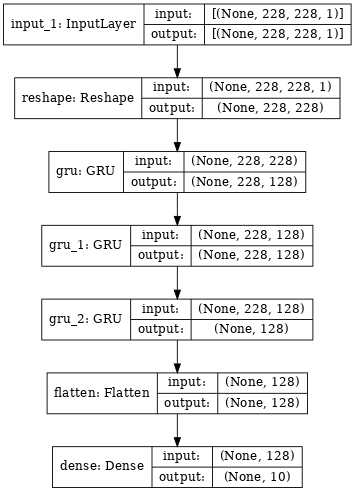

In [17]:
#'''
tf.keras.utils.plot_model(
    model, to_file='model.'+checkpointer_name[8:-5]+'.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=True, dpi=64
)
#'''

In [18]:
#"""
#layer_names=[layer.name for layer in base_model.layers]
base_model = model
num_layers_base_model = len(base_model.layers)
num_layers_model = len(model.layers)

print(f"num_layers_base_model = {num_layers_base_model}")
print(f"num_layers_model = {num_layers_model}")

count_trainable = 0
count_non_trainable = 0

#'''
if pointTrainableAfter == "allDefault":
    for layer in base_model.layers:
        layer.trainable=True
        count_trainable += 1
elif pointTrainableAfter == "allFalse":
    for layer in base_model.layers:
        layer.trainable=False
        count_non_trainable += 1
elif pointTrainableAfter > 0:
    for layer in base_model.layers[:pointTrainableAfter]: # [:-pointTrainableAfter]
        layer.trainable=False
        count_non_trainable += 1
    for layer in base_model.layers[pointTrainableAfter:]: # [-pointTrainableAfter:]
        layer.trainable=True
        count_trainable += 1
#'''

'''
for layer in model.layers:
    layer.trainable=True
    count_trainable += 1
#'''

print("count_non_trainable =", count_non_trainable)
print("count_trainable =", num_layers_model-count_non_trainable)
print("Total number of layers =", num_layers_model)
#"""

num_layers_base_model = 7
num_layers_model = 7
count_non_trainable = 0
count_trainable = 7
Total number of layers = 7


In [19]:
# "RMSProp" "SGD" "Adam" "Adamax" "Adadelta" "Adagrad" "SGD"
#optimizer = tf.keras.optimizers.RMSprop(lr = LEARNING_RATE, epsilon=EPSILON)

if OPTIMIZER == "RMSProp":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = LEARNING_RATE, epsilon=EPSILON)
elif OPTIMIZER == "Adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adamax":
    optimizer = tf.keras.optimizers.Adamax(learning_rate = LEARNING_RATE, epsilon=EPSILON, beta_1=0.9, beta_2=0.999)
elif OPTIMIZER == "Adadelta":
    optimizer = tf.keras.optimizers.Adadelta(learning_rate = LEARNING_RATE, epsilon=EPSILON, rho=0.95)
elif OPTIMIZER == "Adagrad":
    optimizer = tf.keras.optimizers.Adagrad(learning_rate = LEARNING_RATE, epsilon=EPSILON, initial_accumulator_value=0.1)
elif OPTIMIZER == "SGD":
    optimizer = tf.keras.optimizers.SGD(learning_rate = LEARNING_RATE, momentum=0.9)

model.compile(
    #optimizer=OPTIMIZER,
    optimizer=optimizer,
    loss=LOSS,
    metrics=['accuracy']
)

print("OPTIMIZER =", OPTIMIZER)

OPTIMIZER = Adam


In [20]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = work_dir+checkpointer_name, 
                               #monitor='val_accuracy',
                               monitor='val_loss',
                               save_weights_only=False,  
                               mode='auto', 
                               verbose = 1, # 0 = silent, 1 = progress bar, 2 = one line per epoch
                               save_best_only =False
                               )
checkpointer_best = ModelCheckpoint(filepath = work_dir+"best_"+checkpointer_name, 
                                    monitor='val_loss', 
                                    save_weights_only=False,
                                    mode='auto',  
                                    verbose = 1, 
                                    save_best_only = True
                                    )
early_stopping = EarlyStopping(monitor='loss', patience=early_stop_after_epochs)

In [21]:
'''
if 'count_no_improvement' not in globals():
    count_no_improvement = 0
    print("count_no_improvement =", count_no_improvement)
#'''
'''
count_no_improvement = 0 # 0
epoch_initial = False
#'''
min_delta = 0.0009
print("count_no_improvement =", count_no_improvement)

def checkBestPerformance(epoch, logs):
    save_filepath = work_dir+"best_"+checkpointer_name

    global epoch_initial
    #print(f"epoch_initial = {epoch_initial}")
    if epoch_initial == True:
        epoch_initial = False
        model.save(filepath = save_filepath)
        print(". Model saved!")

    elif epoch_initial == False:
        global count_no_improvement

        log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['val_loss', 'val_accuracy'], engine='python')
        min_val_loss = float(str(min(log_data.val_loss.values))[:6])
        max_val_acc = float(str(max(log_data.val_accuracy.values))[:6])

        current_val_acc = float(str(logs['val_accuracy'])[:6])
        current_val_loss = float(str(logs['val_loss'])[:6])

        if (current_val_loss < min_val_loss) and (abs(current_val_loss-min_val_loss) >= min_delta):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_loss decreased from",min_val_loss," to",current_val_loss,"( val_accuracy =",current_val_acc,").")

        elif (current_val_loss==min_val_loss) and (current_val_acc>max_val_acc):
            count_no_improvement = 0
            model.save(filepath = save_filepath)
            print("\nval_accuracy increased to", current_val_acc, ".")

        else:
            count_no_improvement += 1
            print(". count_no_improvement =", count_no_improvement)

        if count_no_improvement >= early_stop_after_epochs-1:
            global list_callbacks
            del list_callbacks, count_no_improvement
            #print("count_no_improvement =", count_no_improvement, "... list_callbacks =", list_callbacks)

count_no_improvement = 0


In [22]:
epochs_completed = 0
list_callbacks = []
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)

#if 'list_callbacks' in globals():
#    del list_callbacks

try:
    log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
    epochs_completed = log_data.shape[0]

    #if epochs_completed > 0:
    model = load_model(work_dir+checkpointer_name)
    list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
    print("epochs_completed =", epochs_completed)

except Exception as error:
    if epochs_completed == 0:
        # list_callbacks = [checkpointer, checkpointer_best, csv_logger, early_stopping] 
        list_callbacks = [checkpointer, LambdaCallback(on_epoch_end=checkBestPerformance), csv_logger]
        print("epochs_completed =", epochs_completed)
    elif epochs_completed > 0:
        print(error)

print('checkpointer_name =', checkpointer_name)

epochs_completed = 0
checkpointer_name = weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5


In [ ]:
print('checkpointer_name =', checkpointer_name)
print("Previously completed epochs =", epochs_completed)
print("count_no_improvement =", count_no_improvement, "\n")

#'''
try:
    start_time = time.time()
    history = model.fit(train_generator, 
                        steps_per_epoch=total_train_data // BATCH_SIZE,
                        shuffle=True, 
                        epochs = NUM_EPOCHS - epochs_completed, 
                        validation_data=val_generator,
                        validation_steps=total_val_data // BATCH_SIZE,
                        callbacks=list_callbacks
                        )
    elapsed_time = time.time() - start_time 
    print("\nTime elapsed: ", elapsed_time)
except Exception as error:
    print("\nError:", error)
#'''

checkpointer_name = weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5
Previously completed epochs = 0
count_no_improvement = 0 



2022-08-28 17:02:50.506086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-08-28 17:02:54.723322: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


218/218 [==============================] - 36s 142ms/step - loss: 2.3120 - accuracy: 0.0960 - val_loss: 2.3096 - val_accuracy: 0.1008

Epoch 00001: saving model to ./weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5
. Model saved!
Epoch 2/300
218/218 [==============================] - 16s 73ms/step - loss: 2.3102 - accuracy: 0.0999 - val_loss: 2.3127 - val_accuracy: 0.1008

Epoch 00002: saving model to ./weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5
. count_no_improvement = 1
Epoch 3/300
218/218 [==============================] - 15s 70ms/step - loss: 2.3104 - accuracy: 0.1006 - val_loss: 2.3071 - val_accuracy: 0.1008

Epoch 00003: saving model to ./weights..BanglaDigits.MeghnaJoygun.grayscale.228p.1fps.DF.noTL.RNN.Custom.wInit.None.TrainableAfter.allDefault.lr0.0001.opt.Adam.batch32.hdf5

val_loss de

In [ ]:
'''
Record: :
;
---

'''
'''
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]

result = model.evaluate(test_generator, steps=total_test_data // BATCH_SIZE)
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result[1],4), round(result[0],4), epochs_completed, checkpointer_name))
#'''

In [ ]:
#checkpointer_name = "weights.Fashion.DenseNet121.wInit.None.TrainableAfterallDefault.opt.SGD.drop.0.0.batch32.Flatten.run_1.hdf5"
model_loaded = load_model(work_dir+"best_"+checkpointer_name)
print("Loaded "+work_dir+"best_"+checkpointer_name+".")

In [ ]:
'''
Record: : 
;
---


'''
'''
csv_logger = CSVLogger(work_dir+log_name, separator=',', append=True)
log_data = pd.read_csv(work_dir+log_name, sep=',', usecols=['epoch'], engine='python')
epochs_completed = log_data.shape[0]
#'''

result2 = model_loaded.evaluate(test_generator, steps=total_test_data // BATCH_SIZE)
#print("nLayers: {}, nNeurons: {}, DROPOUT: {}, Test Acc: {}, Test Loss: {}".format(NUM_LAYERS, NUM_NEURONS, DROPOUT, round(result2[1], 4), round(result2[0], 4)))
print("Test Acc: {}, Test Loss: {}: ep{}, {}\n".format(round(result2[1],4), round(result2[0],4), epochs_completed, "best_"+checkpointer_name))


In [ ]:
import csv

with open(work_dir+'Records.'+checkpointer_name[8:-5]+'.csv', "a") as fp:
    wr = csv.writer(fp, dialect='excel')
    try:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4), elapsed_time])
    except:
        wr.writerow([checkpointer_name[8:-5], round(result2[1], 4), round(result2[0], 4)])
print("Saved results.")

In [ ]:
#Confution Matrix and Classification Report
#'''
Y_pred = model_loaded.predict_generator(test_generator, verbose=1)
#'''
#'''
save_predictions_filename = f"Y_pred.{checkpointer_name[8:-5]}"
np.save(f"{work_dir}{save_predictions_filename}", Y_pred, allow_pickle=True)
print(f"Saved: {work_dir}{save_predictions_filename}")
#'''

In [ ]:
Y_pred_loaded = np.load(f"{work_dir}{save_predictions_filename}.npy", allow_pickle=True)
print(f"Y_pred_loaded.shape = {Y_pred_loaded.shape}")

In [ ]:
y_pred = np.argmax(Y_pred_loaded, axis=1)

In [ ]:
y_true = test_generator.classes

In [ ]:
list_class_names_in_generator = list(test_generator.class_indices.keys())
list_class_names_in_generator[:5]

In [ ]:
conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

In [ ]:
#plt.figure(figsize = (30,30))
plt.matshow(conf_matrix)

In [ ]:
df_conf_matrix = pd.DataFrame(conf_matrix, index = [f"Class {i+1}" for i in range(num_classes)],
                  columns = [f"Class {i+1}" for i in range(num_classes)])

In [ ]:
title = "Confusion matrix for "+dataset+" "+impl_type+"\n"
plt.figure(figsize = (10,5))
plt.title(title)
sn.heatmap(df_conf_matrix, annot=True)

img_path = work_dir+'image_conf_matrix_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
print(f"img_path = {img_path}")

In [ ]:
#Confution Matrix and Classification Report
'''
Y_pred = model_loaded.predict_generator(final_test_imageset, len(final_test_imageset))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(sklearn.metrics.confusion_matrix(np_test_label, y_pred))
#'''

In [ ]:
# Precision [TP/TP+FP] = The ratio of correctly predicted positive observations to the total predicted positive observations.
# Recall (Sensitivity) [TP/TP+FN] = The ratio of correctly predicted positive observations to the all observations in actual class - 'yes'.
# F1 score [F1 Score = 2*(Recall * Precision) / (Recall + Precision)] = The weighted average of Precision and Recall.
# Support = The number of samples of the true response that lie in that class.
'''
print('Classification Report:')
print(sklearn.metrics.classification_report(test_generator.classes, y_pred))
#'''

In [ ]:
test_generator.class_indices.keys()

In [ ]:
#'''
print('Classification Report')
print(sklearn.metrics.classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))
#'''

In [ ]:
log_data = pd.read_csv(work_dir+log_name, sep=',', engine='python') 

In [ ]:
# Getting the model history keys 
#history.history.keys()
log_data.head()

In [ ]:
# plot the training artifacts
title = "Val loss for "+dataset+" "+impl_type+"\n"

plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
#plt.title(title)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'best')
plt.grid(b=True, which='major', axis='both')

img_path = work_dir+'image_vLoss_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)

In [ ]:
title = "Val acc for "+dataset+" "+impl_type+"\n"

plt.plot(log_data['accuracy'])
plt.plot(log_data['val_accuracy'])
#plt.title(title)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'], loc = 'best')
plt.grid(b=True, which='major', axis='both')

img_path = work_dir+'image_vAcc_'+checkpointer_name[8:-5]+'.png'
plt.savefig(img_path, dpi=600)
plt.show()
print('img_path =', img_path)